### Summary of Project

**Objective:**
The project aims to build and implement a basic supervised learning model, specifically a logistic regression (Logit Model), to predict the default of Lending Club loans based on observable characteristics using both Python and R. The analysis includes creating new features, running logistic regression, interpreting results, and comparing outputs from Python and R implementations.

**Data Preparation:**
1. **Dataset:** LC_data_for_PPA2.xlsx
2. **Initial Data Cleaning:**
   - Create the variable `owns_home_with_mortgage` as 1 if `home_ownership` is "Mortgage", otherwise 0.
   - Create the variable `owns_home_outright` as 1 if `home_ownership` is "Own", otherwise 0.
   - Create dummy variables for `LC_grade` ("A", "B", "C", "D").
   - Convert `emp_length` to numeric `years_employed`.
   - Convert `term` to numeric `loan_term_months`.

**Part A: Logistic Regression**
- **Task:** Run a logistic regression with `default` as the target variable and the following features:
  - annual_income
  - dti
  - loan_amount
  - fico_range_high
  - delinq_2yrs
- **Data Split:** 80% of the data as the Training Set and 20% as the Test Set.
- **Outputs:**
  - Confusion Matrix
  - Sensitivity, Specificity, Accuracy
  - ROC Curve and AUC

**Part B: Stepwise Logistic Regression**
- **Task:** Run a stepwise logistic regression with `default` as the target variable and all features.
- **Features:**
  - loan_amnt
  - loan_term_months
  - int_rate
  - installment
  - LC_grade_A
  - LC_grade_B
  - LC_grade_C
  - LC_grade_D
  - years_employeed
  - owns_home_with_mortgage
  - owns_home_outright
  - delinq_2yrs
  - open_acc
  - revol_bal
  - revol_util
  - total_acc
  - tot_cur_bal
  - annual_inc
  - dti
  - fico_range_high


**Conclusion:**
- The project involves comprehensive data preprocessing, logistic regression analysis, stepwise logistic regression, and interpretation of model results. It also includes a comparison of results obtained from Python to evaluate model performance and feature significance.

# Importing

In [357]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import train_test_split


# Loading Data

In [358]:
data = pd.read_excel("/Users/jonathantrejo/Desktop/ML in Finance/LC_data_for_PPA2.xlsx")
data.head()

,Unnamed: 0,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,revol_util,total_acc,tot_cur_bal,last_fico_range_high,annual_inc,dti,fico_range_high,verification_status,loan_status,default
0,0,263591,545710,20000.0,60 months,17.93,342.94,E,Wylie ISD,1 year,...,97.8,20.0,NaN,594.0,44304.0,18.47,694.0,Verified,Charged Off,1
1,1,1613916,69664096,30000.0,36 months,11.99,996.29,C,Sergeant,10+ years,...,40.7,34.0,69594.0,739.0,136000.0,20.63,674.0,Verified,Current,0
2,2,818934,8965180,21500.0,36 months,11.99,714.01,B,Designer,1 year,...,36.2,44.0,74939.0,704.0,50000.0,29.62,739.0,Source Verified,Fully Paid,0
3,3,1606612,70572960,10000.0,36 months,13.67,340.18,C,NaN,NaN,...,57.5,20.0,16824.0,669.0,64400.0,16.68,679.0,Source Verified,Fully Paid,0
4,4,1639932,68589517,5000.0,36 months,8.49,157.82,B,Sr. Manufacturing Engineer,10+ years,...,92.6,5.0,77053.0,699.0,88000.0,5.32,664.0,Source Verified,Current,0


# Data Preparation

In [359]:
data = data.iloc[: ,1:]
data

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,revol_util,total_acc,tot_cur_bal,last_fico_range_high,annual_inc,dti,fico_range_high,verification_status,loan_status,default
0,263591,545710,20000.0,60 months,17.93,342.94,E,Wylie ISD,1 year,MORTGAGE,...,97.8,20.0,NaN,594.0,44304.0,18.47,694.0,Verified,Charged Off,1
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,Sergeant,10+ years,MORTGAGE,...,40.7,34.0,69594.0,739.0,136000.0,20.63,674.0,Verified,Current,0
2,818934,8965180,21500.0,36 months,11.99,714.01,B,Designer,1 year,RENT,...,36.2,44.0,74939.0,704.0,50000.0,29.62,739.0,Source Verified,Fully Paid,0
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,NaN,NaN,RENT,...,57.5,20.0,16824.0,669.0,64400.0,16.68,679.0,Source Verified,Fully Paid,0
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,Sr. Manufacturing Engineer,10+ years,MORTGAGE,...,92.6,5.0,77053.0,699.0,88000.0,5.32,664.0,Source Verified,Current,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,901888,4974773,10500.0,36 months,10.16,339.60,B,Schneider Electric,5 years,MORTGAGE,...,59.5,30.0,243142.0,744.0,78000.0,9.58,689.0,Not Verified,Fully Paid,0
24996,945413,1279809,12000.0,36 months,14.33,412.06,C,Clark County School District,10+ years,RENT,...,58.0,23.0,64497.0,549.0,82000.0,11.75,694.0,Not Verified,Fully Paid,0
24997,366944,63496281,25000.0,36 months,12.69,838.63,C,sales consultant,< 1 year,MORTGAGE,...,74.1,51.0,150935.0,609.0,60000.0,13.34,669.0,Source Verified,Late (31-120 days),0
24998,1043529,98124387,12200.0,60 months,13.49,280.66,C,NaN,NaN,OWN,...,59.6,15.0,13615.0,699.0,44400.0,10.59,699.0,Not Verified,Current,0


In [360]:
print(data.isnull().sum())

id                         0
member_id                  0
loan_amnt                  1
term                       1
int_rate                   1
installment                1
grade                      1
emp_title               1606
emp_length              1502
home_ownership             1
addr_state                 1
delinq_2yrs                2
open_acc                   2
revol_bal                  1
revol_util                17
total_acc                  2
tot_cur_bal             1004
last_fico_range_high       1
annual_inc                 1
dti                       12
fico_range_high            1
verification_status        1
loan_status                1
default                    0
dtype: int64


In [361]:
data = data.dropna()

In [362]:
print(data.isnull().sum())

id                      0
member_id               0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_title               0
emp_length              0
home_ownership          0
addr_state              0
delinq_2yrs             0
open_acc                0
revol_bal               0
revol_util              0
total_acc               0
tot_cur_bal             0
last_fico_range_high    0
annual_inc              0
dti                     0
fico_range_high         0
verification_status     0
loan_status             0
default                 0
dtype: int64


In [363]:
# Create new features
data['owns_home_with_mortgage'] = data['home_ownership'].apply(lambda x: 1 if x == "MORTGAGE" else 0)
data['owns_home_outright'] = data['home_ownership'].apply(lambda x: 1 if x == "OWN" else 0)
data['LC_grade_A'] = data['grade'].apply(lambda x: 1 if x == "A" else 0)
data['LC_grade_B'] = data['grade'].apply(lambda x: 1 if x == "B" else 0)
data['LC_grade_C'] = data['grade'].apply(lambda x: 1 if x == "C" else 0)
data['LC_grade_D'] = data['grade'].apply(lambda x: 1 if x == "D" else 0)

In [364]:
data

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,fico_range_high,verification_status,loan_status,default,owns_home_with_mortgage,owns_home_outright,LC_grade_A,LC_grade_B,LC_grade_C,LC_grade_D
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,Sergeant,10+ years,MORTGAGE,...,674.0,Verified,Current,0,1,0,0,0,1,0
2,818934,8965180,21500.0,36 months,11.99,714.01,B,Designer,1 year,RENT,...,739.0,Source Verified,Fully Paid,0,0,0,0,1,0,0
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,Sr. Manufacturing Engineer,10+ years,MORTGAGE,...,664.0,Source Verified,Current,0,1,0,0,1,0,0
5,756884,107370446,16150.0,60 months,30.74,529.88,F,Meat and produce unloader,10+ years,RENT,...,664.0,Verified,Charged Off,1,0,0,0,0,0,0
6,1251123,114228157,18400.0,36 months,14.08,629.59,C,Owner,8 years,RENT,...,684.0,Not Verified,Current,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,93890,24364807,13925.0,36 months,11.67,460.32,B,Service Coordinator,< 1 year,RENT,...,719.0,Not Verified,Fully Paid,0,0,0,0,1,0,0
24995,901888,4974773,10500.0,36 months,10.16,339.60,B,Schneider Electric,5 years,MORTGAGE,...,689.0,Not Verified,Fully Paid,0,1,0,0,1,0,0
24996,945413,1279809,12000.0,36 months,14.33,412.06,C,Clark County School District,10+ years,RENT,...,694.0,Not Verified,Fully Paid,0,0,0,0,0,1,0
24997,366944,63496281,25000.0,36 months,12.69,838.63,C,sales consultant,< 1 year,MORTGAGE,...,669.0,Source Verified,Late (31-120 days),0,1,0,0,0,1,0


In [365]:
def convert_emp_length(emp_length):
    if pd.isnull(emp_length):
        return None
    elif '+' in emp_length:
        return 10
    else:
        try:
            return int(emp_length.split()[0])
        except ValueError:
            return None

In [366]:
data['emp_length'] = data['emp_length'].apply(convert_emp_length)


In [367]:
print(data["emp_length"])

1        10.0
2         1.0
4        10.0
5        10.0
6         8.0
         ... 
24994     NaN
24995     5.0
24996    10.0
24997     NaN
24999     6.0
Name: emp_length, Length: 22445, dtype: float64


In [368]:
def convert_term_to_months(term):
    if pd.isnull(term):
        return None
    else:
        return int(term.split()[0])

In [369]:
data['term'] = data['term'].apply(convert_term_to_months)

In [370]:
data['term']

1        36
2        36
4        36
5        60
6        36
         ..
24994    36
24995    36
24996    36
24997    36
24999    36
Name: term, Length: 22445, dtype: int64

#### Splitting the data

In [371]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [372]:
train_data

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,fico_range_high,verification_status,loan_status,default,owns_home_with_mortgage,owns_home_outright,LC_grade_A,LC_grade_B,LC_grade_C,LC_grade_D
16252,1087577,94606977,9000.0,36,7.99,281.99,A,Sales consultant,10.0,MORTGAGE,...,714.0,Source Verified,Current,0,1,0,1,0,0,0
4668,618991,43789244,24000.0,60,18.84,620.47,E,premier banker,4.0,MORTGAGE,...,674.0,Source Verified,Charged Off,1,1,0,0,0,0,0
12060,614826,43276221,10400.0,60,17.86,263.31,D,auto technician,10.0,MORTGAGE,...,699.0,Verified,Current,0,1,0,0,0,0,1
13189,1241955,116869568,10200.0,60,16.02,248.16,C,Customer Service Manager,9.0,RENT,...,699.0,Source Verified,Current,0,0,0,0,0,1,0
24039,224046,10766270,10000.0,36,12.85,336.22,B,Chief Housekeeper ll,10.0,MORTGAGE,...,709.0,Source Verified,Fully Paid,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12249,1519997,76001130,16000.0,36,5.32,481.84,A,Elevator Constructor/Mechanic,10.0,MORTGAGE,...,699.0,Not Verified,Current,0,1,0,1,0,0,0
19277,1303144,112106326,4000.0,36,13.59,135.92,C,Kitchen manager,10.0,RENT,...,674.0,Source Verified,Current,0,0,0,0,0,1,0
5771,516305,53272206,7200.0,36,12.69,241.53,C,Account manager,2.0,MORTGAGE,...,689.0,Source Verified,Fully Paid,0,1,0,0,0,1,0
13614,1245801,116714398,7000.0,36,7.97,219.26,A,Project Coordinator,4.0,MORTGAGE,...,719.0,Not Verified,Current,0,1,0,1,0,0,0


In [373]:
train_data.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                 1448
home_ownership                0
addr_state                    0
delinq_2yrs                   0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
tot_cur_bal                   0
last_fico_range_high          0
annual_inc                    0
dti                           0
fico_range_high               0
verification_status           0
loan_status                   0
default                       0
owns_home_with_mortgage       0
owns_home_outright            0
LC_grade_A                    0
LC_grade_B                    0
LC_grade_C                    0
LC_grade_D                    0
dtype: int64

In [374]:
test_data

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,fico_range_high,verification_status,loan_status,default,owns_home_with_mortgage,owns_home_outright,LC_grade_A,LC_grade_B,LC_grade_C,LC_grade_D
21225,498862,55250371,25600.0,60,9.17,533.53,B,Accounting Manager,9.0,MORTGAGE,...,704.0,Verified,Current,0,1,0,0,1,0,0
5731,422871,60385685,15000.0,36,8.18,471.30,B,Sr. Consultant,2.0,RENT,...,679.0,Source Verified,Current,0,0,0,0,1,0,0
20062,1030651,98247255,8000.0,36,23.99,313.83,E,Director of Security,3.0,RENT,...,674.0,Source Verified,Late (31-120 days),0,0,0,0,0,0,0
8315,106906,22463051,3000.0,36,10.99,98.21,B,Apparel Manager,9.0,RENT,...,694.0,Not Verified,Fully Paid,0,0,0,0,1,0,0
7986,694732,38644210,8000.0,36,9.49,256.23,B,Sheriff's officer,6.0,MORTGAGE,...,674.0,Not Verified,Fully Paid,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,636528,42121603,12000.0,36,7.89,375.43,A,Direstor of Operations/Pilot,10.0,MORTGAGE,...,719.0,Not Verified,Current,0,1,0,1,0,0,0
4187,1180856,84476037,4000.0,36,12.79,134.38,C,Substance Abuse Tech,6.0,MORTGAGE,...,669.0,Source Verified,Current,0,1,0,0,0,1,0
19865,322527,65019014,20000.0,60,13.67,461.96,C,Manufacturing Engineer,10.0,MORTGAGE,...,744.0,Not Verified,Current,0,1,0,0,0,1,0
5901,1229203,116940171,15000.0,60,16.02,364.94,C,SUPERVISOR,10.0,MORTGAGE,...,689.0,Verified,Current,0,1,0,0,0,1,0


In [375]:
test_data.isna().sum()

id                           0
member_id                    0
loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
emp_title                    0
emp_length                 379
home_ownership               0
addr_state                   0
delinq_2yrs                  0
open_acc                     0
revol_bal                    0
revol_util                   0
total_acc                    0
tot_cur_bal                  0
last_fico_range_high         0
annual_inc                   0
dti                          0
fico_range_high              0
verification_status          0
loan_status                  0
default                      0
owns_home_with_mortgage      0
owns_home_outright           0
LC_grade_A                   0
LC_grade_B                   0
LC_grade_C                   0
LC_grade_D                   0
dtype: int64

In [376]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'emp_length', 'home_ownership', 'addr_state',
       'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'tot_cur_bal', 'last_fico_range_high', 'annual_inc', 'dti',
       'fico_range_high', 'verification_status', 'loan_status', 'default',
       'owns_home_with_mortgage', 'owns_home_outright', 'LC_grade_A',
       'LC_grade_B', 'LC_grade_C', 'LC_grade_D'],
      dtype='object')

In [377]:
x_train = train_data[["annual_inc", "dti", "loan_amnt", "fico_range_high", "delinq_2yrs"]]
y_train = train_data.default.values

x_test = test_data[["annual_inc", "dti", "loan_amnt", "fico_range_high", "delinq_2yrs"]]
y_test = test_data.default.values

In [378]:
x_train

,annual_inc,dti,loan_amnt,fico_range_high,delinq_2yrs
16252,140000.0,4.55,9000.0,714.0,0.0
4668,115000.0,17.76,24000.0,674.0,0.0
12060,90000.0,24.43,10400.0,699.0,0.0
13189,38000.0,28.68,10200.0,699.0,0.0
24039,80000.0,31.20,10000.0,709.0,0.0
...,...,...,...,...,...
12249,142000.0,9.25,16000.0,699.0,3.0
19277,50000.0,14.86,4000.0,674.0,1.0
5771,40000.0,12.81,7200.0,689.0,0.0
13614,43000.0,10.27,7000.0,719.0,0.0


In [379]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

#### Optimal Threshold

In [380]:

model = LogisticRegression(penalty=None, solver="newton-cg")
model.fit(x_train, y_train)


y_pred_proba = model.predict_proba(x_test)[:, 1]


optimal_threshold = 0
max_f1_score = 0


for threshold in np.arange(0.1, 1.0, 0.1):
    
    y_pred_custom = np.where(y_pred_proba > threshold, 1, 0)
    
    
    f1_custom = f1_score(y_test, y_pred_custom, average="weighted")
    
    
    if f1_custom > max_f1_score:
        max_f1_score = f1_custom
        optimal_threshold = threshold

print("Optimal Threshold:", optimal_threshold)
print("Maximum F1 Score:", max_f1_score)

Optimal Threshold: 0.30000000000000004
Maximum F1 Score: 0.8484143327863393


In [381]:
print(model.intercept_, model.coef_)

[7.00406133] [[-3.64836523e-06  7.58226382e-03  2.48138662e-05 -1.36510481e-02
  -3.34185484e-02]]


In [382]:
THRESHOLD = [0.1, 0.2, 0.3, 0.4]

results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results


results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      



for i in THRESHOLD:                                                                                       
    
    preds = np.where(model.predict_proba(x_test)[:,1] > i, 1, 0)                                      
    
    
   
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)


Confusion matrix for threshold = 0.1
[[ 6.66072622  3.63109824]
 [39.63020717 50.07796837]]
 
Confusion matrix for threshold = 0.2
[[2.22766763e-02 1.02695478e+01]
 [1.11383382e-01 8.95967922e+01]]
 
Confusion matrix for threshold = 0.3
[[ 0.         10.29182446]
 [ 0.         89.70817554]]
 
Confusion matrix for threshold = 0.4
[[ 0.         10.29182446]
 [ 0.         89.70817554]]
 
ALL METRICS
                       0         1         2         3
THRESHOLD            0.1       0.2       0.3       0.4
accuracy        0.567387  0.896191  0.897082  0.897082
true pos rate   0.647186  0.002165       0.0       0.0
true neg rate   0.558232  0.998758       1.0       1.0
false pos rate  0.441768  0.001242       0.0       0.0
precision       0.143888  0.166667       0.0       0.0
f-score         0.235433  0.004274       0.0       0.0


In [383]:
import statsmodels.api as sm

logistic_model = sm.Logit(y_train, x_train).fit()  

# Odds ratio for annual_income
annual_income_coef = logistic_model.params['annual_inc']
odds_ratio_annual_income = np.exp(annual_income_coef)

# Odds ratio for loan_amount
loan_amount_coef = logistic_model.params['loan_amnt']
odds_ratio_loan_amount = np.exp(loan_amount_coef)

print(odds_ratio_annual_income)
print(odds_ratio_loan_amount)

Optimization terminated successfully.
         Current function value: 0.311664
         Iterations 6
0.9999963824147245
1.0000221683939616


Annual income has a odds ration of 0.9999963824147245 which means that the odds of being predicted as defaul decreases, so fo each additional unit increase in income, the odds decrease by 3.64836523e-06, holding all other variables constant.  This indicates that a higher annual income is associated with a small decrease in the off of defaulting on a loan.

Loan amount has an odds ratio of 1.0000221683939616 which mean that the offs of being predicted as default increase, so for each additional unit increase in loan amount, the odds of defaulting increases by 2.48138662e-05, holding other variables constant. This indicates that higher loan amount are associated with slightly higher increase in the odds of defaulting. 

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6320475319730349


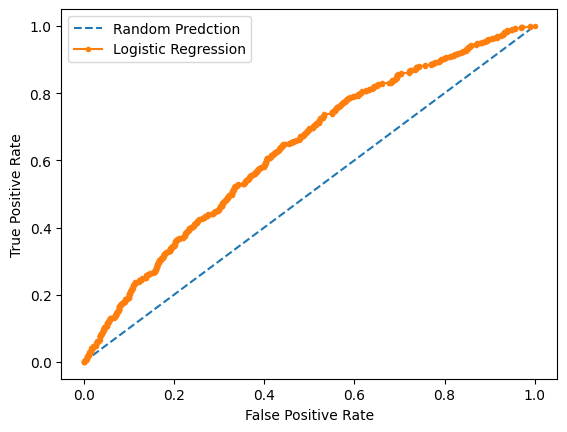

In [384]:
lr_prob=model.predict_proba(x_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The AUC is 0.6320475319730349 which is greater than the AUC for random prediction. This indicated that the model is performning better thatn the random classifer. 

# Stepwise Logistic Regression


In [385]:
data

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,fico_range_high,verification_status,loan_status,default,owns_home_with_mortgage,owns_home_outright,LC_grade_A,LC_grade_B,LC_grade_C,LC_grade_D
1,1613916,69664096,30000.0,36,11.99,996.29,C,Sergeant,10.0,MORTGAGE,...,674.0,Verified,Current,0,1,0,0,0,1,0
2,818934,8965180,21500.0,36,11.99,714.01,B,Designer,1.0,RENT,...,739.0,Source Verified,Fully Paid,0,0,0,0,1,0,0
4,1639932,68589517,5000.0,36,8.49,157.82,B,Sr. Manufacturing Engineer,10.0,MORTGAGE,...,664.0,Source Verified,Current,0,1,0,0,1,0,0
5,756884,107370446,16150.0,60,30.74,529.88,F,Meat and produce unloader,10.0,RENT,...,664.0,Verified,Charged Off,1,0,0,0,0,0,0
6,1251123,114228157,18400.0,36,14.08,629.59,C,Owner,8.0,RENT,...,684.0,Not Verified,Current,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,93890,24364807,13925.0,36,11.67,460.32,B,Service Coordinator,NaN,RENT,...,719.0,Not Verified,Fully Paid,0,0,0,0,1,0,0
24995,901888,4974773,10500.0,36,10.16,339.60,B,Schneider Electric,5.0,MORTGAGE,...,689.0,Not Verified,Fully Paid,0,1,0,0,1,0,0
24996,945413,1279809,12000.0,36,14.33,412.06,C,Clark County School District,10.0,RENT,...,694.0,Not Verified,Fully Paid,0,0,0,0,0,1,0
24997,366944,63496281,25000.0,36,12.69,838.63,C,sales consultant,NaN,MORTGAGE,...,669.0,Source Verified,Late (31-120 days),0,1,0,0,0,1,0


In [386]:
data.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                 1827
home_ownership                0
addr_state                    0
delinq_2yrs                   0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
tot_cur_bal                   0
last_fico_range_high          0
annual_inc                    0
dti                           0
fico_range_high               0
verification_status           0
loan_status                   0
default                       0
owns_home_with_mortgage       0
owns_home_outright            0
LC_grade_A                    0
LC_grade_B                    0
LC_grade_C                    0
LC_grade_D                    0
dtype: int64

In [387]:
data = data.dropna()

In [388]:
data.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_title                  0
emp_length                 0
home_ownership             0
addr_state                 0
delinq_2yrs                0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
tot_cur_bal                0
last_fico_range_high       0
annual_inc                 0
dti                        0
fico_range_high            0
verification_status        0
loan_status                0
default                    0
owns_home_with_mortgage    0
owns_home_outright         0
LC_grade_A                 0
LC_grade_B                 0
LC_grade_C                 0
LC_grade_D                 0
dtype: int64

In [389]:
data

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,fico_range_high,verification_status,loan_status,default,owns_home_with_mortgage,owns_home_outright,LC_grade_A,LC_grade_B,LC_grade_C,LC_grade_D
1,1613916,69664096,30000.0,36,11.99,996.29,C,Sergeant,10.0,MORTGAGE,...,674.0,Verified,Current,0,1,0,0,0,1,0
2,818934,8965180,21500.0,36,11.99,714.01,B,Designer,1.0,RENT,...,739.0,Source Verified,Fully Paid,0,0,0,0,1,0,0
4,1639932,68589517,5000.0,36,8.49,157.82,B,Sr. Manufacturing Engineer,10.0,MORTGAGE,...,664.0,Source Verified,Current,0,1,0,0,1,0,0
5,756884,107370446,16150.0,60,30.74,529.88,F,Meat and produce unloader,10.0,RENT,...,664.0,Verified,Charged Off,1,0,0,0,0,0,0
6,1251123,114228157,18400.0,36,14.08,629.59,C,Owner,8.0,RENT,...,684.0,Not Verified,Current,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,1073601,96589441,12000.0,36,16.99,427.78,D,Project Manager,10.0,MORTGAGE,...,674.0,Source Verified,Current,0,1,0,0,0,0,1
24993,1233714,117251524,6400.0,36,14.08,218.99,C,Store Specialist,2.0,RENT,...,674.0,Source Verified,Current,0,0,0,0,0,1,0
24995,901888,4974773,10500.0,36,10.16,339.60,B,Schneider Electric,5.0,MORTGAGE,...,689.0,Not Verified,Fully Paid,0,1,0,0,1,0,0
24996,945413,1279809,12000.0,36,14.33,412.06,C,Clark County School District,10.0,RENT,...,694.0,Not Verified,Fully Paid,0,0,0,0,0,1,0


In [398]:
import statsmodels.api as sm



features = ['loan_amnt', 'term', 'int_rate', 'installment',
            'LC_grade_A', 'LC_grade_B', 'LC_grade_C', 'LC_grade_D',
            'emp_length', 'owns_home_with_mortgage', 'owns_home_outright',
            'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
            'tot_cur_bal', 'annual_inc', 'dti', 'fico_range_high']
target = 'default'


def stepwise_logit(X, y, initial_features=[], threshold_in=0.05, threshold_out=0.1):
    included = list(initial_features)
    while True:
        changed = False
        
       
        excluded = [var for var in X.columns if var not in included]
        new_pval = pd.Series(index=excluded)
        for new_var in excluded:
            model = sm.Logit(y, sm.add_constant(X[included + [new_var]])).fit(disp=False)
            new_pval[new_var] = model.pvalues[new_var]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_var = new_pval.idxmin()
            included.append(best_var)
            changed = True
        
        
        model = sm.Logit(y, sm.add_constant(X[included])).fit(disp=False)
        pvalues = model.pvalues.iloc[1:] 
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_var = pvalues.idxmax()
            included.remove(worst_var)
            changed = True
        
        if not changed:
            break
    
    return included


selected_features = stepwise_logit(data[features], data[target])


X = data[selected_features]
X = sm.add_constant(X)
y = data[target]
model2 = sm.Logit(y, X).fit()


print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.297239
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                20618
Model:                          Logit   Df Residuals:                    20607
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 May 2024   Pseudo R-squ.:                 0.07101
Time:                        19:01:52   Log-Likelihood:                -6128.5
converged:                       True   LL-Null:                       -6596.9
Covariance Type:            nonrobust   LLR p-value:                7.349e-195
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6255      0.803      3.270      0.001       1.052       4.199
int_rate      

In [399]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model2.predict(X)

auc = roc_auc_score(y, y_pred_prob)
print("AUC:", auc)

aic = model2.aic
print("AIC:", aic)

AUC: 0.6970287486626083
AIC: 12278.951713012382


The best Logit model to predict default with the fewest features is the model that consists of the following features: int_rate, fico_range_high, tot_cur_bal, total_acc, LC_grade_A, LC_grade_B, LC_grade_C, LC_grade_D, dti, and installment. 

The AUC is equal to AUC: 0.6970287486626083 and the AIC is equal to AIC: 12278.951713012382.

When presenting the result to my manager I would metioned how a step logistic regression model was done to find the optimal model that would give us the best results with the fewest features. I would then highligh the AUC value as a higher AUC indicates that the classification or preditive algorith is better. Overall i would mention how the model selected offers a balance between predictive perfomance and simplicity, which can be a good tool for assessing credit risk. 